In [2]:
import os
# import pkg_resources
# pkg_resources.require('Torch==2.0.1')
!pip install torch==2.0.1
import torch
print('Using torch', torch.__version__)
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install ogb
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 553.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [11]:
import torch
import torch_geometric
from torch_geometric.datasets import TUDataset, MoleculeNet

dataset_dd = TUDataset('\tmp\dd', 'DD')
dataset_prot = TUDataset('\tmp\prot', 'PROTEINS')
dataset_cast = MoleculeNet('\tmp\cast', 'ToxCast')
dataset_clin = MoleculeNet('\tmp\clin', 'ClinTox')

dataset_list = [dataset_dd, dataset_prot, dataset_cast, dataset_clin]



Extracting 	mp\dd/DD/DD.zip
Processing...
Done!
Extracting 	mp\prot/PROTEINS/PROTEINS.zip
Processing...
Done!


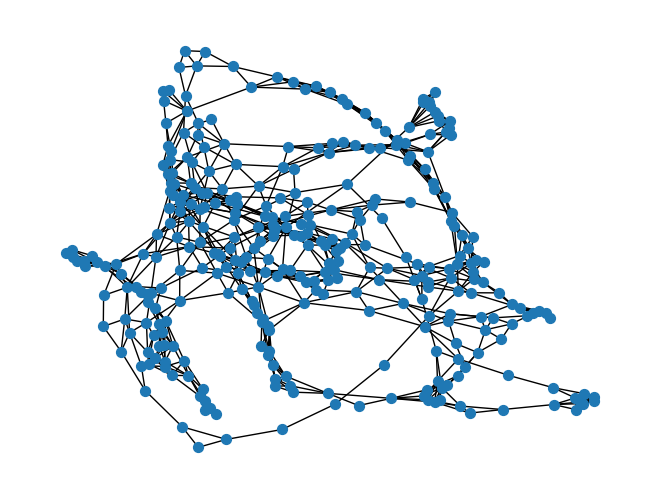

In [12]:
import torch_geometric
import networkx as nx
import random

data_dd = torch_geometric.data.Data(x=dataset_dd[0].x, edge_index=dataset_dd[0].edge_index)
g_dd = torch_geometric.utils.to_networkx(data_dd, to_undirected=True)
nx.draw(g_dd, node_size=50)

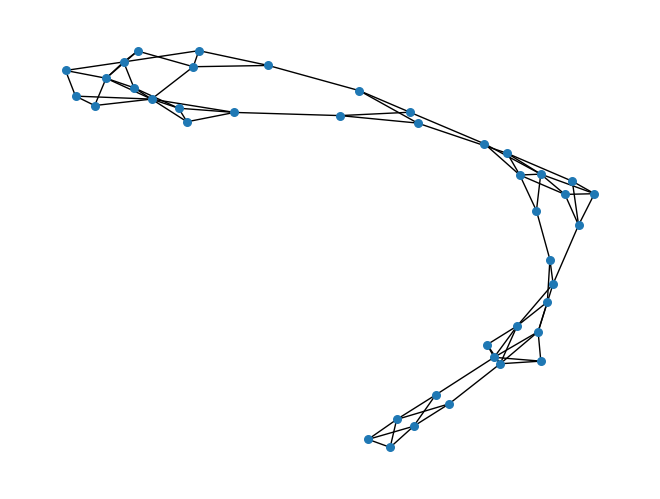

In [5]:
import torch_geometric
import networkx as nx
import random

data_prot = torch_geometric.data.Data(x=dataset_prot[0].x, edge_index=dataset_prot[0].edge_index)
g_prot = torch_geometric.utils.to_networkx(data_prot, to_undirected=True)
nx.draw(g_prot, node_size=30)

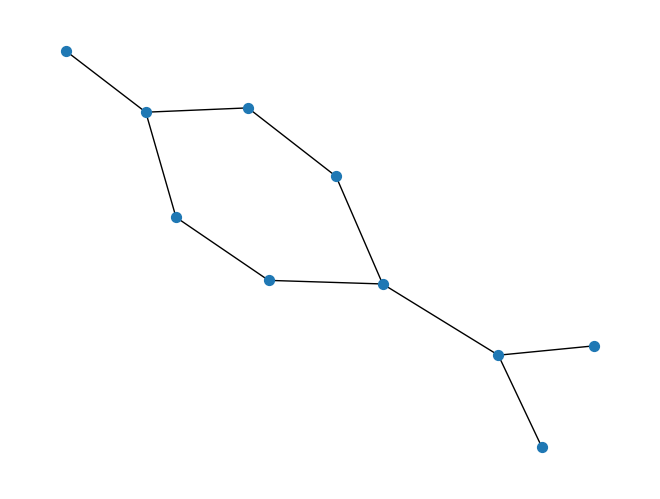

In [18]:
import torch_geometric
import networkx as nx
import random

data_cast = torch_geometric.data.Data(x=dataset_cast[0].x, edge_index=dataset_cast[0].edge_index)
g_cast = torch_geometric.utils.to_networkx(data_cast, to_undirected=True)
nx.draw(g_cast, node_size=50)

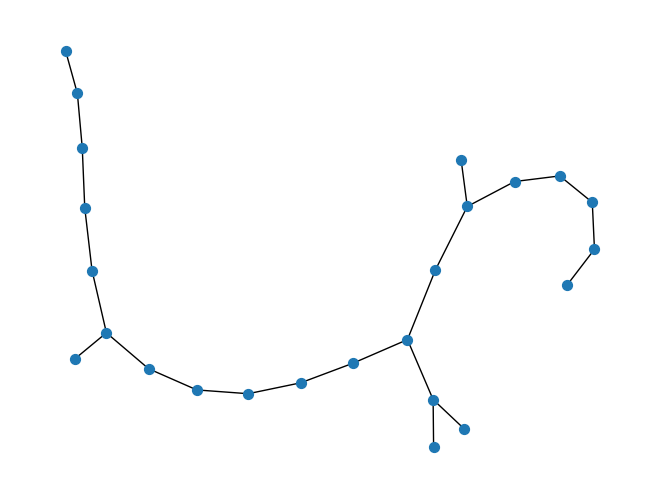

In [13]:
import torch_geometric
import networkx as nx
import random

data_clin = torch_geometric.data.Data(x=dataset_clin[0].x, edge_index=dataset_clin[0].edge_index)
g_clin = torch_geometric.utils.to_networkx(data_clin, to_undirected=True)
nx.draw(g_clin, node_size=50)

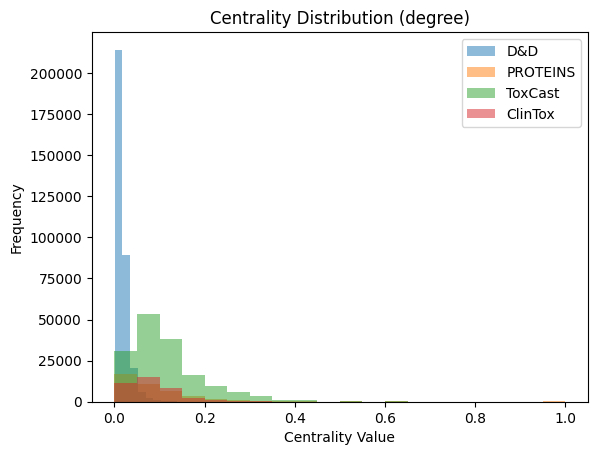

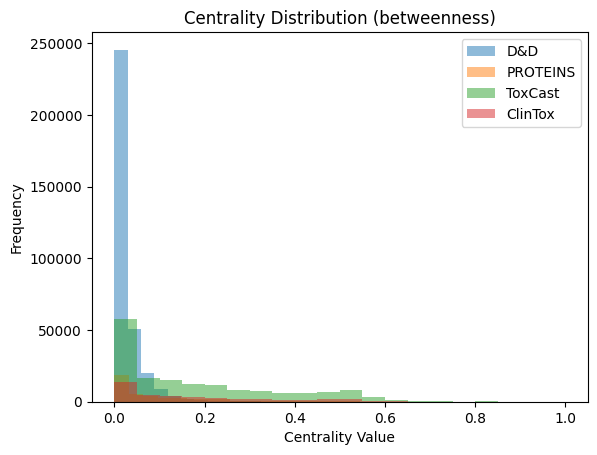

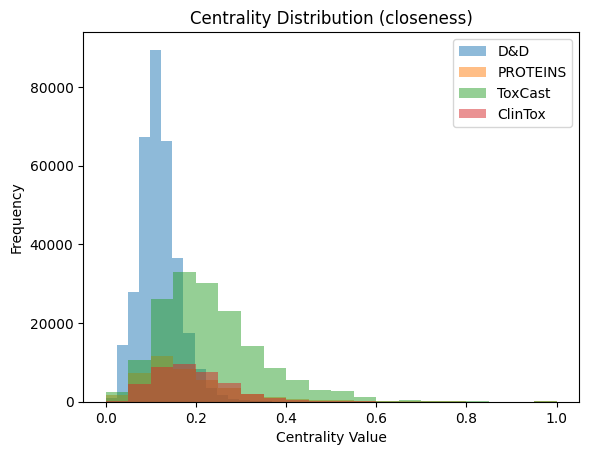

In [13]:
import matplotlib
import torch_geometric
import networkx as nx
import matplotlib.pyplot as plt

def calculate_centrality(data, centrality_measure):
    # Convert the PyG data to a NetworkX graph
    G = torch_geometric.utils.to_networkx(data, to_undirected=True)

    # Calculate centrality measure
    if centrality_measure == 'degree':
        centrality_values = nx.degree_centrality(G).values()
    elif centrality_measure == 'betweenness':
        centrality_values = nx.betweenness_centrality(G).values()
    elif centrality_measure == 'closeness':
        centrality_values = nx.closeness_centrality(G).values()
    else:
        raise ValueError("Invalid centrality measure")

    return list(centrality_values)

# Example usage:

dataset_list = [dataset_dd, dataset_prot, dataset_cast, dataset_clin]
centrality_measure = 'degree'  # Change to 'betweenness' or 'closeness' as needed

for i, dataset in enumerate(dataset_list):
    all_centrality_values = []
    for data in dataset:
        centrality_values = calculate_centrality(data, centrality_measure)
        all_centrality_values.extend(centrality_values)

    # Plot histogram
    plt.hist(all_centrality_values, bins=20, alpha=0.5, label=f'Dataset {i + 1}')

plt.title(f'Centrality Distribution ({centrality_measure})')
plt.xlabel('Centrality Value')
plt.ylabel('Frequency')
plt.legend(labels=['D&D', 'PROTEINS', 'ToxCast', 'ClinTox'])
plt.show()

centrality_measure = 'betweenness'  # Change to 'betweenness' or 'closeness' as needed

for i, dataset in enumerate(dataset_list):
    all_centrality_values = []
    for data in dataset:
        centrality_values = calculate_centrality(data, centrality_measure)
        all_centrality_values.extend(centrality_values)

    # Plot histogram
    plt.hist(all_centrality_values, bins=20, alpha=0.5, label=f'Dataset {i + 1}')

plt.title(f'Centrality Distribution ({centrality_measure})')
plt.xlabel('Centrality Value')
plt.ylabel('Frequency')
plt.legend(labels=['D&D', 'PROTEINS', 'ToxCast', 'ClinTox'])
plt.show()

centrality_measure = 'closeness'  # Change to 'betweenness' or 'closeness' as needed

for i, dataset in enumerate(dataset_list):
    all_centrality_values = []
    for data in dataset:
        centrality_values = calculate_centrality(data, centrality_measure)
        all_centrality_values.extend(centrality_values)

    # Plot histogram
    plt.hist(all_centrality_values, bins=20, alpha=0.5, label=f'Dataset {i + 1}')

plt.title(f'Centrality Distribution ({centrality_measure})')
plt.xlabel('Centrality Value')
plt.ylabel('Frequency')
plt.legend(labels=['D&D', 'PROTEINS', 'ToxCast', 'ClinTox'])
plt.show()

In [14]:
from torch_geometric.loader import DataLoader

for dataset in dataset_list:
  print(dataset)
  print('Number of classes:', dataset.num_classes)

  # Use DataLoader to iterate through the dataset
  data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

  # Initialize two variables to store the total number of nodes and edges
  total_nodes = 0
  total_edges = 0

  # Iterate through the dataset
  graph_sizes = []
  for data in data_loader:
      num_nodes = data.num_nodes
      total_nodes += num_nodes
      # deal with outliers
      if num_nodes != 0:
        graph_sizes.append(num_nodes)
      num_edges = data.edge_index.size(1)
      total_edges += num_edges

  # Calculate the max and min number of nodes
  max_nodes = max(graph_sizes)
  min_nodes = min(graph_sizes)

  # Calculate the mean number of nodes and edges
  mean_nodes = total_nodes / len(dataset)
  mean_edges = total_edges / len(dataset)

  print("Max number of nodes:", max_nodes)
  print("Min number of nodes:", min_nodes)
  print("Mean number of nodes:", mean_nodes)
  print("Mean number of edges:", mean_edges)
  print("Number node features:", dataset.num_features)
  print("NUmber edge features:", dataset.num_edge_features)

DD(1178)
Number of classes: 2
Max number of nodes: 5748
Min number of nodes: 30
Mean number of nodes: 284.3166383701188
Mean number of edges: 1431.3174872665534
Number node features: 89
NUmber edge features: 0
PROTEINS(1113)
Number of classes: 2
Max number of nodes: 620
Min number of nodes: 4
Mean number of nodes: 39.05750224618149
Mean number of edges: 145.6316262353998
Number node features: 3
NUmber edge features: 0
ToxCast(8597)
Number of classes: 617
Max number of nodes: 124
Min number of nodes: 2
Mean number of nodes: 18.740607188554147
Mean number of edges: 38.432476445271604
Number node features: 9
NUmber edge features: 3
ClinTox(1484)
Number of classes: 2
Max number of nodes: 136
Min number of nodes: 1
Mean number of nodes: 26.05188679245283
Mean number of edges: 55.5377358490566
Number node features: 9
NUmber edge features: 3


In [18]:
import numpy as np

# outputs
pb = [0.7297297297297297, 0.6936936936936937, 0.6306306306306306]
db = [0.7203389830508474, 0.7203389830508474, 0.8135593220338984]
cab = [0.6550131347453804, 0.6489285967448071, 0.6307807797930923]
clb = [0.6024523124467178, 0.6520326747720365, 0.6441915397970086]
pa = [0.7143, 0.6875, 0.7054]
da = [0.635593220338983, 0.5932203389830508, 0.66429384723094]
caf = [0.65763476286, 0.5876234768, 0.64854958745]
clf = [0.58834628374, 0.5736284762387, 0.66642837468]

# Calculate mean and standard error
print(np.mean(pb))
print(np.std(pb, ddof=1) / np.sqrt(len(pb)))
print(np.mean(db))
print(np.std(db, ddof=1) / np.sqrt(len(db)))
print(np.mean(cab))
print(np.std(cab, ddof=1) / np.sqrt(len(cab)))
print(np.mean(clb))
print(np.std(clb, ddof=1) / np.sqrt(len(clb)))
print('----')
print(np.mean(pa))
print(np.std(pa, ddof=1) / np.sqrt(len(pa)))
print(np.mean(pb))
print(np.std(da, ddof=1) / np.sqrt(len(da)))
print('-----')
print(np.mean(caf))
print(np.std(caf, ddof=1) / np.sqrt(len(caf)))
print(np.mean(clf))
print(np.std(clf, ddof=1) / np.sqrt(len(clf)))


0.6846846846846848
0.028959912195174038
0.7514124293785311
0.031073446327683645
0.6449075037610933
0.007278476219218188
0.632892175671921
0.015387330332679095
----
0.7024
0.007880566815485645
0.6846846846846848
0.020643307542179377
-----
0.6312692757033334
0.02197992966693536
0.6094677115529
0.028795493410836374
